In [857]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm

In [858]:
df=pd.read_csv('train.csv')
dft=pd.read_csv('test.csv',index_col=0)
df.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   60    Male              6.3               3.2                   314   
1   31  Female              0.8               0.2                   158   
2   60    Male             19.6               9.5                   466   
3   34    Male              8.7               4.0                   298   
4   26  Female              0.9               0.2                   154   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                       118                         114             6.6   
1                        21                          16             6.0   
2                        46                          52             6.1   
3                        58                         138             5.8   
4                        16                          12             7.0   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.7                        1.27        1  
1      3.0                        1.00        1  
2      2.0                        0.40        1  
3      2.4                        0.70        1  
4      3.5                        1.00        1

In [859]:
dft.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   46       1              0.8               0.2                   160   
1   15       1              0.8               0.2                   380   
2   66       0              4.2               2.1                   159   
3   32       1              0.6               0.1                   237   
4   60       1              2.6               1.2                   171   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        31                          40             7.3   
1                        25                          66             6.1   
2                        15                          30             7.1   
3                        45                          31             7.5   
4                        42                          37             5.4   

   Albumin  Albumin_and_Globulin_Ratio  DataSet  
0      3.8                        1.10        1  
1      3.7                        1.50        1  
2      2.2                        0.40        1  
3      4.3                        1.34        1  
4      2.7                        1.00        1

### Checking for null values in both the files(train and test)

In [860]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    3
Dataset                       0
dtype: int64

In [861]:
dft.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
DataSet                       0
dtype: int64

### Filling null values 

In [862]:
med_AG_ratio=df.Albumin_and_Globulin_Ratio.median()
med_AG_ratio

0.96

In [863]:
df.Albumin_and_Globulin_Ratio=df.Albumin_and_Globulin_Ratio.fillna(med_AG_ratio)

In [864]:
df['Albumin_and_Globulin_Ratio'].isnull().value_counts(dropna=False)

False    466
Name: Albumin_and_Globulin_Ratio, dtype: int64

In [865]:
med_AG_ratio=dft.Albumin_and_Globulin_Ratio.median()
med_AG_ratio

0.9

In [654]:
dft.Albumin_and_Globulin_Ratio=dft.Albumin_and_Globulin_Ratio.fillna(med_AG_ratio)
dft['Albumin_and_Globulin_Ratio'].isnull().value_counts(dropna=False)

False    117
Name: Albumin_and_Globulin_Ratio, dtype: int64

### Converting categorical data(Gender) of train and test file into numbers.

In [866]:
le=LabelEncoder()
dfle=df
dfle.Gender=le.fit_transform(dfle.Gender)


In [867]:
le=LabelEncoder()
dfle=dft
dfle.Gender=le.fit_transform(dfle.Gender)

In [868]:
df.head(3)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   60       1              6.3               3.2                   314   
1   31       0              0.8               0.2                   158   
2   60       1             19.6               9.5                   466   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                       118                         114             6.6   
1                        21                          16             6.0   
2                        46                          52             6.1   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.7                        1.27        1  
1      3.0                        1.00        1  
2      2.0                        0.40        1

In [869]:
dft.head(3)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   46       1              0.8               0.2                   160   
1   15       1              0.8               0.2                   380   
2   66       0              4.2               2.1                   159   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        31                          40             7.3   
1                        25                          66             6.1   
2                        15                          30             7.1   

   Albumin  Albumin_and_Globulin_Ratio  DataSet  
0      3.8                         1.1        1  
1      3.7                         1.5        1  
2      2.2                         0.4        1

In [870]:
df.Gender.value_counts()

1    361
0    105
Name: Gender, dtype: int64

## Data Visualization

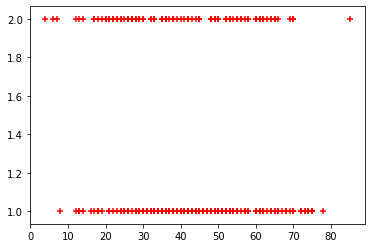

In [871]:
plt.scatter(df.Age,df.Dataset,marker='+',color='red')

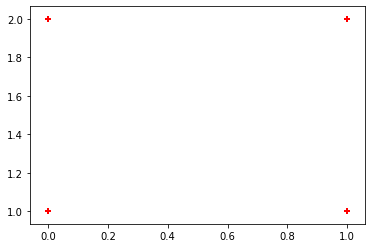

In [872]:
plt.scatter(df.Gender,df.Dataset,marker='+',color='red')

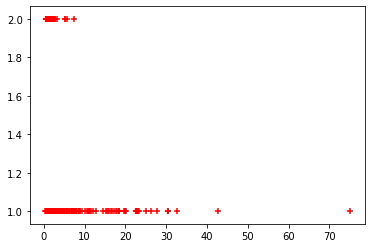

In [873]:
plt.scatter(df.Total_Bilirubin,df.Dataset,marker='+',color='red')

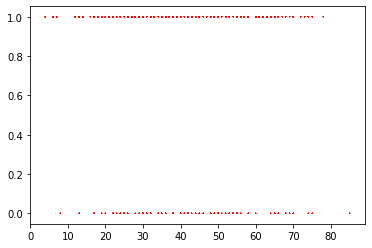

In [874]:
plt.scatter(df.Age,df.Gender,df.Dataset,marker='+',color='red')

In [875]:
df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).count().sort_values(by='Dataset', ascending=False)

Dataset  Gender  Age
2        2       0   34
3        2       1   99
0        1       0   71
1        1       1  262

In [876]:
df.shape

(466, 11)

In [877]:
df.describe()

Age      Gender  Total_Bilirubin  Direct_Bilirubin  \
count  466.000000  466.000000       466.000000        466.000000   
mean    45.321888    0.774678         3.406438          1.503004   
std     15.697936    0.418243         6.510448          2.823700   
min      4.000000    0.000000         0.400000          0.100000   
25%     33.000000    1.000000         0.800000          0.200000   
50%     46.000000    1.000000         1.000000          0.300000   
75%     58.000000    1.000000         2.575000          1.300000   
max     85.000000    1.000000        75.000000         19.700000   

       Alkaline_Phosphotase  Alamine_Aminotransferase  \
count            466.000000                466.000000   
mean             294.877682                 82.633047   
std              252.718859                192.801900   
min               63.000000                 10.000000   
25%              176.000000                 23.000000   
50%              210.000000                 36.000000   
75%              298.000000                 60.000000   
max             2110.000000               2000.000000   

       Aspartate_Aminotransferase  Total_Protiens     Albumin  \
count                  466.000000      466.000000  466.000000   
mean                   114.982833        6.491845    3.149356   
std                    312.869109        1.096455    0.805285   
min                     10.000000        2.700000    0.900000   
25%                     25.000000        5.800000    2.600000   
50%                     42.000000        6.600000    3.100000   
75%                     88.000000        7.200000    3.800000   
max                   4929.000000        9.600000    5.500000   

       Albumin_and_Globulin_Ratio     Dataset  
count                  466.000000  466.000000  
mean                     0.954142    1.285408  
std                      0.332568    0.452094  
min                      0.300000    1.000000  
25%                      0.700000    1.000000  
50%                      0.960000    1.000000  
75%                      1.100000    2.000000  
max                      2.800000    2.000000

In [878]:
df.Dataset.unique()

array([1, 2], dtype=int64)

### Feature Selection

In [879]:
feature_cols=['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']

In [880]:
X=df[feature_cols]
X.head(5)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   60       1              6.3               3.2                   314   
1   31       0              0.8               0.2                   158   
2   60       1             19.6               9.5                   466   
3   34       1              8.7               4.0                   298   
4   26       0              0.9               0.2                   154   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                       118                         114             6.6   
1                        21                          16             6.0   
2                        46                          52             6.1   
3                        58                         138             5.8   
4                        16                          12             7.0   

   Albumin  Albumin_and_Globulin_Ratio  
0      3.7                        1.27  
1      3.0                        1.00  
2      2.0                        0.40  
3      2.4                        0.70  
4      3.5                        1.00

In [881]:
X.shape

(466, 10)

In [882]:
y=df['Dataset']

In [883]:
y.shape

(466,)

In [884]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=1)

In [885]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(396, 10)
(70, 10)
(70,)
(396,)


In [886]:
X=df.ix[:,['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']]
y=df.ix[:,'Dataset']
X

c:\users\gunjan\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
c:\users\gunjan\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     60       1              6.3               3.2                   314   
1     31       0              0.8               0.2                   158   
2     60       1             19.6               9.5                   466   
3     34       1              8.7               4.0                   298   
4     26       0              0.9               0.2                   154   
5     37       1              1.8               0.8                   215   
6     37       1              0.8               0.2                   195   
7     55       1              0.8               0.2                   482   
8     33       1              0.9               0.8                   680   
9     58       0              1.7               0.8                  1896   
10    60       1              1.8               0.5                   201   
11    60       1              2.0               1.1                   664   
12    60       1              5.8               2.7                   204   
13    54       1              0.8               0.2                   181   
14    58       1              1.0               0.4                   182   
15    42       1              8.9               4.5                   272   
16    50       1              0.9               0.3                   194   
17    30       1              1.6               0.4                   332   
18    45       1              0.6               0.1                   196   
19    48       1              4.5               2.3                   282   
20    60       1             11.5               5.0                  1050   
21    48       1              0.7               0.2                   326   
22    56       0              0.7               0.1                   145   
23    58       1              0.4               0.1                   100   
24    45       1              2.4               1.1                   168   
25    13       0              0.7               0.2                   350   
26    32       1              3.7               1.6                   612   
27    50       0              1.0               0.5                   239   
28    45       0              0.8               0.2                   165   
29    37       1              0.7               0.2                   235   
..   ...     ...              ...               ...                   ...   
436   70       1              1.3               0.3                   690   
437   45       1              3.2               1.4                   512   
438   62       1              1.2               0.4                   195   
439   60       1              6.8               3.2                   308   
440   60       1              0.5               0.1                   500   
441   50       0              0.7               0.1                   192   
442   60       1              5.8               2.7                   599   
443   32       1             15.6               9.5                   134   
444   58       1              0.8               0.2                   123   
445   68       0              0.6               0.1                  1620   
446   13       1              1.5               0.5                   575   
447   65       0              1.0               0.3                   202   
448   22       1              0.9               0.3                   179   
449   45       1              1.7               0.8                   315   
450   45       1              2.5               1.2                   163   
451   60       1              0.8               0.2                   215   
452   33       1              1.5               7.0                   505   
453   57       1              0.6               0.1                   210   
454   66       1              1.0               0.3                   190   
455   45       0              0.7               0.2                   170   
4

## Logistic Regression

In [887]:
model = LogisticRegression(solver='newton-cg')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
# print(y_test,y_pred)
l=accuracy_score(y_test,y_pred)
l

# model.score(X,y)
# model.predict([[45,1,0.6,0.1,196,29,30,5.8,2.9,1]])
# model.predict([[30,1,0.8,0.2,174,21,47,4.6,2.3,1]])

0.7714285714285715

In [888]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

## Random Forest

In [889]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r=accuracy_score(y_test,y_pred)
r

c:\users\gunjan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7714285714285715

## Naive Bayes

In [890]:
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
n=accuracy_score(y_test,y_pred)
n

0.45714285714285713

## Decision Tree

In [891]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
d=accuracy_score(y_test,y_pred)
d


0.6428571428571429

## K-Nearest Neighbour

In [892]:
model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
k=accuracy_score(y_test,y_pred)
k

0.7571428571428571

## Support Vector Machine

In [893]:
from sklearn import svm
svm=svm.SVC()
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
s=accuracy_score(y_test,y_pred)
s

c:\users\gunjan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8428571428571429

### Model Evaluation

In [894]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression','Random Forest','Gaussian Naive Bayes','Decision Tree','K-Nearest Neighbour','Support Vector Machine'],
    'Accuracy': [ l, r, n,d,k,s]})
models.sort_values(by='Accuracy', ascending=False)

Model  Accuracy
5  Support Vector Machine  0.842857
0     Logistic Regression  0.771429
1           Random Forest  0.771429
4     K-Nearest Neighbour  0.757143
3           Decision Tree  0.642857
2    Gaussian Naive Bayes  0.457143

### The best model that fits to the problem is Support Vector Machine with Accuracy= 0.842857

In [895]:
X_test=dft.loc[:,['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']]

In [896]:
y_pred=svm.predict(X_test)

In [897]:
dft['DataSet'] = y_pred

In [898]:
dft.to_csv('test.csv')